# Abhishek Pise
***
### Libraries required:
    1. Numpy
    2. Pandas

## Dataset Information


The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


Variable | Description
----------|--------------
Item_Identifier | Unique product ID
Item_Weight | Weight of product
Item_Fat_Content | Whether the product is low fat or not
Item_Visibility | The % of total display area of all products in a    store allocated to the particular product
Item_Type | The category to which the product belongs
Item_MRP | Maximum Retail Price (list price) of the product
Outlet_Identifier | Unique store ID
Outlet_Establishment_Year | The year in which store was established
Outlet_Size | The size of the store in terms of ground area covered
Outlet_Location_Type | The type of city in which the store is located
Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket
Item_Outlet_Sales | Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [1]:
import numpy as np
import pandas as pd

In [3]:
mart_data = pd.read_csv('Train.csv')

In [5]:
mart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [7]:
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
mart_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [13]:
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
mart_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [17]:
len(mart_data['Item_Identifier'].unique())

1559

In [19]:
mart_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [21]:
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
mart_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [25]:
mart_data['Item_Fat_Content'] = mart_data['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [27]:
mart_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [29]:
numerical = []
categorical = []
for col in mart_data.columns:
    if mart_data.dtypes[col] != 'object':
        numerical.append(col)
    else:
        categorical.append(col)

In [31]:
numerical

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [33]:
categorical

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [35]:
mart_data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [37]:
for unique_count in categorical:
    print(mart_data[unique_count].value_counts())

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64
Outlet_Size
Medium    2793
Small     

In [39]:
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [41]:
mart_data.Item_Identifier.value_counts()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [43]:
mart_data.Item_Weight.value_counts()

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

In [45]:
mart_data[mart_data.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [47]:
mart_data.Item_Weight.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [49]:
list_of_null_weight = mart_data.Item_Weight.isnull()

### Will be applying pivoting

### Pivot summarizes the data

In [51]:
pivot_weight = mart_data.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')

In [53]:
pivot_weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [55]:
pivot_weight = pivot_weight.reset_index()
pivot_weight

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1550,NCZ30,6.590
1551,NCZ41,19.850
1552,NCZ42,10.500
1553,NCZ53,9.600


In [57]:
mart_data.loc[mart_data['Item_Identifier'] == 'DRA12']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
118,DRA12,11.6,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772
1197,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158
1245,DRA12,11.6,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772
1693,DRA12,11.6,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078
7467,DRA12,11.6,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924
8043,DRA12,11.6,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308


In [59]:
mart_data.iloc[118]

Item_Identifier                          DRA12
Item_Weight                               11.6
Item_Fat_Content                       Low Fat
Item_Visibility                       0.041178
Item_Type                          Soft Drinks
Item_MRP                              140.3154
Outlet_Identifier                       OUT017
Outlet_Establishment_Year                 2007
Outlet_Size                                NaN
Outlet_Location_Type                    Tier 2
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                    2552.6772
Name: 118, dtype: object

In [61]:
pivot_weight.index

RangeIndex(start=0, stop=1555, step=1)

In [63]:
pivot_weight

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1550,NCZ30,6.590
1551,NCZ41,19.850
1552,NCZ42,10.500
1553,NCZ53,9.600


In [65]:
pivot_weight.Item_Identifier

0       DRA12
1       DRA24
2       DRA59
3       DRB01
4       DRB13
        ...  
1550    NCZ30
1551    NCZ41
1552    NCZ42
1553    NCZ53
1554    NCZ54
Name: Item_Identifier, Length: 1555, dtype: object

### Following Items weight can't be determined
### So we'll be removing those

In [67]:
invalid_data = set(mart_data.Item_Identifier) - set(pivot_weight.Item_Identifier)
invalid_data

{'FDE52', 'FDK57', 'FDN52', 'FDQ60'}

In [69]:
weight_dict = dict(zip(pivot_weight.Item_Identifier, pivot_weight.Item_Weight))

In [71]:
mart_data[mart_data['Item_Identifier'].isin(invalid_data)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [73]:
mart_data[~mart_data['Item_Identifier'].isin(invalid_data)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [75]:
new_mart_data = mart_data[~mart_data['Item_Identifier'].isin(invalid_data)]
new_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                6109 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [77]:
if new_mart_data.Item_Weight.isnull().any():
    new_mart_data.loc[new_mart_data.Item_Weight.isnull(), 'Item_Weight'] =  new_mart_data.loc[new_mart_data.Item_Weight.isnull(),'Item_Identifier'].apply(lambda x: weight_dict[x])

new_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                6109 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [79]:
new_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [81]:
new_mart_data.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: count, dtype: int64

In [83]:
new_mart_data[new_mart_data.Outlet_Type == 'Grocery Store']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
...,...,...,...,...,...,...,...,...,...,...,...,...
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8480,FDQ58,7.315,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8490,FDU44,12.150,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [85]:
new_mart_data[(new_mart_data.Outlet_Type == 'Grocery Store') & (new_mart_data.Outlet_Size == 'Small')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
49,FDS02,10.195,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,5.940,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720
63,FDY40,15.500,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076
...,...,...,...,...,...,...,...,...,...,...,...,...
8454,NCH54,13.500,Low Fat,0.127234,Household,158.3920,OUT019,1985,Small,Tier 1,Grocery Store,159.7920
8458,FDX20,7.365,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,1985,Small,Tier 1,Grocery Store,452.7440
8469,FDQ45,9.500,Regular,0.019114,Snack Foods,182.1608,OUT019,1985,Small,Tier 1,Grocery Store,367.5216
8480,FDQ58,7.315,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020


#### Replace grocery store with smalls
#### replace supermarket1, 2 and 3 with the mode (highest size type) in the place where there is nan.

In [87]:
outlet_size_mode = new_mart_data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()))

In [89]:
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [91]:
outlet_size_mode_dict = {
    'Grocery Store': 'Small',
    'Supermarket Type1': 'Small',
    'Supermarket Type2': 'Medium',
    'Supermarket Type3': 'Medium'
}

In [93]:
if new_mart_data.Outlet_Size.isnull().any():
    new_mart_data.loc[new_mart_data.Outlet_Size.isnull(), 'Outlet_Size'] =  new_mart_data.loc[new_mart_data.Outlet_Size.isnull(),'Outlet_Type'].apply(lambda x: outlet_size_mode_dict[x])

new_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [95]:
new_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Item_Visibility
#### Some Item's have visibility recorded as 0.0... or basically zero. We will be replacing it the mean of the of the whole field.

In [97]:
item_visibility_mean = new_mart_data['Item_Visibility'].mean()
item_visibility_mean

0.06611236082486209

In [99]:
len(new_mart_data.loc[new_mart_data['Item_Visibility'] == 0.0000000])

526

In [101]:
new_mart_data['Item_Visibility'] = new_mart_data['Item_Visibility'].apply(lambda x: item_visibility_mean if x == 0.0 else x)

C:\Users\Abhishek Pise\AppData\Local\Temp\ipykernel_6072\3873412080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_mart_data['Item_Visibility'] = new_mart_data['Item_Visibility'].apply(lambda x: item_visibility_mean if x == 0.0 else x)


In [103]:
len(new_mart_data.loc[new_mart_data['Item_Visibility'] == 0.0000000])

0

In [105]:
new_mart_data['Item_Visibility'].mean()

0.07019442465792669

In [107]:
categorical

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [109]:
categorical.remove('Item_Identifier')
categorical.remove('Outlet_Identifier')
categorical

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

#### Remove item identifier and outlet indentifier from the categorical array as they don't provide any good bases for the making of a model

In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [113]:
for col in categorical:
    new_mart_data[col] = le.fit_transform(new_mart_data[col])

C:\Users\Abhishek Pise\AppData\Local\Temp\ipykernel_6072\2832822177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_mart_data[col] = le.fit_transform(new_mart_data[col])
C:\Users\Abhishek Pise\AppData\Local\Temp\ipykernel_6072\2832822177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_mart_data[col] = le.fit_transform(new_mart_data[col])
C:\Users\Abhishek Pise\AppData\Local\Temp\ipykernel_6072\2832822177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [115]:
new_mart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.920,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.500,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.200,1,0.066112,6,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.930,0,0.066112,9,53.8614,OUT013,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,13,214.5218,OUT013,1987,0,2,1,2778.3834
8519,FDS36,8.380,1,0.046982,0,108.1570,OUT045,2002,2,1,1,549.2850
8520,NCJ29,10.600,0,0.035186,8,85.1224,OUT035,2004,2,1,1,1193.1136
8521,FDN46,7.210,1,0.145221,13,103.1332,OUT018,2009,1,2,2,1845.5976


In [117]:
X = new_mart_data.drop(columns = ['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales', 'Outlet_Establishment_Year'])
y = new_mart_data['Item_Outlet_Sales']

In [119]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8519 non-null   float64
 1   Item_Fat_Content      8519 non-null   int32  
 2   Item_Visibility       8519 non-null   float64
 3   Item_Type             8519 non-null   int32  
 4   Item_MRP              8519 non-null   float64
 5   Outlet_Size           8519 non-null   int32  
 6   Outlet_Location_Type  8519 non-null   int32  
 7   Outlet_Type           8519 non-null   int32  
dtypes: float64(3), int32(5)
memory usage: 432.6 KB


In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [123]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6815, 8), (1704, 8), (6815,), (1704,))

In [125]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [127]:
model.predict(X_train)

array([ 734.44155863, 2945.82850895, 1857.25078157, ..., 1518.61548837,
       1625.41694098, 1429.88553743])

In [129]:
model.predict(X_test)

array([1879.83815737, 1894.83991151,   44.51404273, ..., 1621.16183673,
       1365.79583752, 2337.27210479])

In [131]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print('Mean Squared Error (Training):', mse_train)
print('Mean Squared Error (Testing):', mse_test)

Mean Squared Error (Training): 1453781.1036005004
Mean Squared Error (Testing): 1444082.3118694504


### Standard Scaling

In [134]:
from sklearn.preprocessing import StandardScaler

In [136]:
scaler = StandardScaler()

In [138]:
scaled_X_train = scaler.fit_transform(X_train)

In [140]:
scaled_X_train = pd.DataFrame(scaled_X_train, columns = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

In [142]:
scaled_X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-1.090416,-0.739666,0.206051,0.663404,-1.215726,0.801637,-0.125562,-0.25005
1,-0.730567,1.351962,-0.713972,-0.287855,0.483916,-0.666164,-1.351498,-0.25005
2,-0.300896,-0.739666,-1.007857,0.187774,-0.164682,0.801637,-0.125562,-0.25005
3,1.009602,1.351962,0.133711,0.663404,-0.469767,0.801637,-1.351498,-0.25005
4,-1.010927,-0.739666,-0.792749,-1.714744,-0.755658,0.801637,-1.351498,-0.25005


In [144]:
scaled_X_test = scaler.fit_transform(X_test)

In [146]:
scaled_X_test = pd.DataFrame(scaled_X_test, columns = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

In [148]:
scaled_X_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.242265,-0.730584,-0.760232,0.876517,-0.133114,0.792205,-0.192446,-0.260921
1,-1.305091,1.368767,-0.856099,-0.306614,-0.978557,-0.656205,1.059187,0.981005
2,-0.536979,1.368767,-1.063736,1.349769,-0.861803,0.792205,1.059187,-1.502847
3,1.046982,-0.730584,-1.275006,-0.779867,0.544022,-0.656205,1.059187,2.222931
4,-0.559762,1.368767,-1.185957,0.639891,0.926824,0.792205,-0.192446,-0.260921


In [150]:
y_train = pd.DataFrame(y_train, columns = ['Item_Outlet_Sales'])

In [152]:
scaled_y_train = scaler.fit_transform(y_train)

In [154]:
scaled_y_train = pd.DataFrame(scaled_y_train, columns = ['Item_Outlet_Sales'])

In [156]:
y_train.head()

,Item_Outlet_Sales
6294,1162.4868
549,2386.2272
4711,2782.3782
764,1125.2020
6866,647.8234


In [158]:
y_test = pd.DataFrame(y_test, columns = ['Item_Outlet_Sales'])

In [160]:
scaled_y_test = scaler.fit_transform(y_test)

In [162]:
scaled_y_test = pd.DataFrame(scaled_y_test, columns = ['Item_Outlet_Sales'])

In [164]:
scaled_y_test.head()

,Item_Outlet_Sales
0,-0.503199
1,-0.943469
2,-1.117260
3,1.732910
4,0.099276


In [166]:
standardscaled_model = LinearRegression()
model.fit(scaled_X_train, scaled_y_train)

LinearRegression()

In [168]:
scaled_y_train_pred = model.predict(scaled_X_train)
scaled_y_test_pred = model.predict(scaled_X_test)

scaled_mse_train = mean_squared_error(scaled_y_train, scaled_y_train_pred)
scaled_mse_test = mean_squared_error(scaled_y_test, scaled_y_test_pred)

print('Mean Squared Error (Training):', scaled_mse_train)
print('Mean Squared Error (Testing):', scaled_mse_test)

Mean Squared Error (Training): 0.5018624536558823
Mean Squared Error (Testing): 0.4855389757674315


### Mean Max Scaling

In [171]:
from sklearn.preprocessing import MinMaxScaler

In [173]:
mima_scaler = MinMaxScaler()

In [175]:
# New sacled X
mima_scaled_all_X = mima_scaler.fit_transform(X)

In [177]:
mima_scaled_X_train = mima_scaler.fit_transform(X_train)

In [179]:
mima_scaled_X_train = pd.DataFrame(mima_scaled_X_train, columns = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

In [181]:
mima_scaled_X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.194701,0.0,0.234098,0.666667,0.143433,1.0,0.5,0.333333
1,0.294433,1.0,0.097382,0.400000,0.594464,0.5,0.0,0.333333
2,0.413516,0.0,0.053710,0.533333,0.422347,1.0,0.5,0.333333
3,0.776719,1.0,0.223348,0.666667,0.341387,1.0,0.0,0.333333
4,0.216731,0.0,0.085675,0.000000,0.265520,1.0,0.0,0.333333


In [183]:
mima_scaled_X_test = mima_scaler.fit_transform(X_test)

In [185]:
mima_scaled_X_test = pd.DataFrame(mima_scaled_X_test, columns = ['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])

In [187]:
y_train = pd.DataFrame(y_train, columns = ['Item_Outlet_Sales'])

In [189]:
mima_scaled_y_train = mima_scaler.fit_transform(y_train)

In [191]:
mima_scaled_y_train = pd.DataFrame(mima_scaled_y_train, columns = ['Item_Outlet_Sales'])

In [193]:
y_test = pd.DataFrame(y_test, columns = ['Item_Outlet_Sales'])

In [195]:
mima_scaled_y_test = mima_scaler.fit_transform(y_test)

In [197]:
mima_scaled_y_test = pd.DataFrame(mima_scaled_y_test, columns = ['Item_Outlet_Sales'])

In [199]:
mima_model = LinearRegression()
mima_model.fit(mima_scaled_X_train, mima_scaled_y_train)

LinearRegression()

In [201]:
mima_scaled_y_train_pred = model.predict(mima_scaled_X_train)
mima_scaled_y_test_pred = model.predict(mima_scaled_X_test)

mima_scaled_mse_train = mean_squared_error(mima_scaled_y_train, mima_scaled_y_train_pred)
mima_scaled_mse_test = mean_squared_error(mima_scaled_y_test, mima_scaled_y_test_pred)

print('Mean Squared Error (Training):', mima_scaled_mse_train)
print('Mean Squared Error (Testing):', mima_scaled_mse_test)

Mean Squared Error (Training): 0.044192397343220606
Mean Squared Error (Testing): 0.03825611868345116


## PCA

In [204]:
def covariance(x):
    return (x.T @ x)/(x.shape[0]-1)
cov_mat = covariance(mima_scaled_all_X)
#np.cov(cov_mat)

In [206]:
cov_mat

array([[0.3219878 , 0.17111392, 0.10089496, 0.24150461, 0.23264325,
        0.3589553 , 0.27598158, 0.19834711],
       [0.17111392, 0.35254755, 0.07585628, 0.15124051, 0.16498723,
        0.25604602, 0.19582062, 0.14134773],
       [0.10089496, 0.07585628, 0.06457673, 0.09733835, 0.09532492,
        0.15408495, 0.1124394 , 0.07495178],
       [0.24150461, 0.15124051, 0.09733835, 0.3109478 , 0.22683274,
        0.35025436, 0.2684159 , 0.1930761 ],
       [0.23264325, 0.16498723, 0.09532492, 0.22683274, 0.28679725,
        0.33860463, 0.25917203, 0.18631339],
       [0.3589553 , 0.25604602, 0.15408495, 0.35025436, 0.33860463,
        0.64504579, 0.33781404, 0.25459811],
       [0.27598158, 0.19582062, 0.1124394 , 0.2684159 , 0.25917203,
        0.33781404, 0.47467128, 0.2730101 ],
       [0.19834711, 0.14134773, 0.07495178, 0.1930761 , 0.18631339,
        0.25459811, 0.2730101 , 0.2305836 ]])

In [208]:
from numpy.linalg import eig

eig_vales, eig_vecs = eig(cov_mat)

In [210]:
eig_vales.shape

(8,)

In [212]:
eig_vales

array([1.93976738, 0.22121551, 0.23456162, 0.02245082, 0.05001516,
       0.07622478, 0.07406011, 0.06886241])

In [214]:
eig_vecs.shape

(8, 8)

In [216]:
eig_vecs

array([[-3.62490685e-01, -1.24502236e-01, -1.20066407e-04,
         4.40760334e-02,  8.33514784e-02,  6.60579182e-01,
        -6.10344035e-01,  1.87948981e-01],
       [-2.76560126e-01,  8.66175131e-01,  3.98125547e-01,
         3.12185741e-02,  2.05468933e-02,  7.17618230e-02,
         8.20383904e-02,  3.83973558e-02],
       [-1.45797969e-01, -2.65750399e-02,  3.96542168e-02,
        -9.73780835e-01,  1.53763939e-01, -6.29160615e-02,
        -2.17857281e-02,  1.17792587e-02],
       [-3.51139503e-01, -2.16653673e-01, -3.50217889e-02,
         3.22864595e-02,  9.60274692e-02,  3.96644119e-01,
         7.74040283e-01,  2.48610345e-01],
       [-3.40449540e-01, -9.17671707e-02,  1.49125118e-02,
         5.15419126e-02,  1.00299808e-01,  9.28226859e-02,
         5.47015383e-02, -9.22564678e-01],
       [-5.22605975e-01, -3.62906948e-01,  5.15853079e-01,
         1.38850336e-01, -5.09879014e-02, -5.11870669e-01,
        -1.10756501e-01,  1.81436977e-01],
       [-4.15978613e-01,  2.008921

In [218]:
cov_mat.shape

(8, 8)

In [220]:
eig_pairs = [(np.abs(eig_vales[i]), eig_vecs[i,:]) for i in range (len(eig_vales))]
eig_pairs

[(1.9397673815732581,
  array([-3.62490685e-01, -1.24502236e-01, -1.20066407e-04,  4.40760334e-02,
          8.33514784e-02,  6.60579182e-01, -6.10344035e-01,  1.87948981e-01])),
 (0.22121551370924714,
  array([-0.27656013,  0.86617513,  0.39812555,  0.03121857,  0.02054689,
          0.07176182,  0.08203839,  0.03839736])),
 (0.23456162105567013,
  array([-0.14579797, -0.02657504,  0.03965422, -0.97378083,  0.15376394,
         -0.06291606, -0.02178573,  0.01177926])),
 (0.022450823495564393,
  array([-0.3511395 , -0.21665367, -0.03502179,  0.03228646,  0.09602747,
          0.39664412,  0.77404028,  0.24861035])),
 (0.05001515845968867,
  array([-0.34044954, -0.09176717,  0.01491251,  0.05154191,  0.10029981,
          0.09282269,  0.05470154, -0.92256468])),
 (0.07622477831725781,
  array([-0.52260597, -0.36290695,  0.51585308,  0.13885034, -0.0509879 ,
         -0.51187067, -0.1107565 ,  0.18143698])),
 (0.07406010515033613,
  array([-0.41597861,  0.20089219, -0.68798262,  0.116307

In [222]:
eig_pairs.sort(reverse=True)

In [224]:
sorted_eig_values = np.array([x[0] for x in eig_pairs])
sorted_eig_vectors = np.array([x[1] for x in eig_pairs])

In [226]:
# select top k eign vectors
k = 2
w = sorted_eig_vectors[:k, :]

In [228]:
total_eig_values = sum(sorted_eig_values)
total_eig_values

2.6871577956005877

In [230]:
explained_variance = [(i/total_eig_values)*100 for i in sorted_eig_values]
explained_variance = np.round(explained_variance, 2)
cummulative_explained_variance = np.cumsum(explained_variance)

print('Explained Variance: {}'.format(explained_variance))
print('Cummulative Explained Variance: {}'.format(cummulative_explained_variance))

Explained Variance: [72.19  8.73  8.23  2.84  2.76  2.56  1.86  0.84]
Cummulative Explained Variance: [ 72.19  80.92  89.15  91.99  94.75  97.31  99.17 100.01]


In [232]:
n_sample, n_features = mima_scaled_all_X.shape

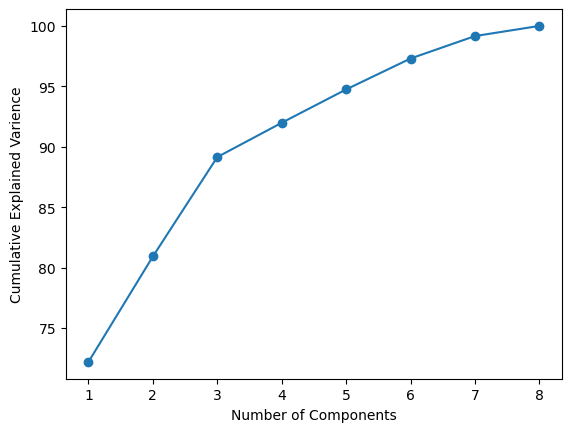

In [234]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1, n_features+1), cummulative_explained_variance, '-o')
plt.xticks(np.arange(1, n_features+1))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Varience")
plt.show()

In [236]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2).fit(mima_scaled_all_X)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cummulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cummulative Explained Variance:\n', cummulative_explained_variance)

X_pca = pca.transform(mima_scaled_all_X)
print('Transformed data shape: ', X_pca.shape)

Components:
 [[-6.98311838e-03  4.71419757e-02  3.13468843e-02 -8.05958466e-03
   2.14128902e-04  5.37853182e-01 -7.63574338e-01 -3.52632139e-01]
 [-2.47069979e-02  9.90905414e-01  1.62857345e-02 -1.21943890e-01
   2.79339667e-03 -2.73992434e-02  3.57299469e-02  1.80370751e-02]]
Explained variance ratio:
 [0.2842168  0.27859887]
Cummulative Explained Variance:
 [0.2842168  0.56281566]
Transformed data shape:  (8519, 2)


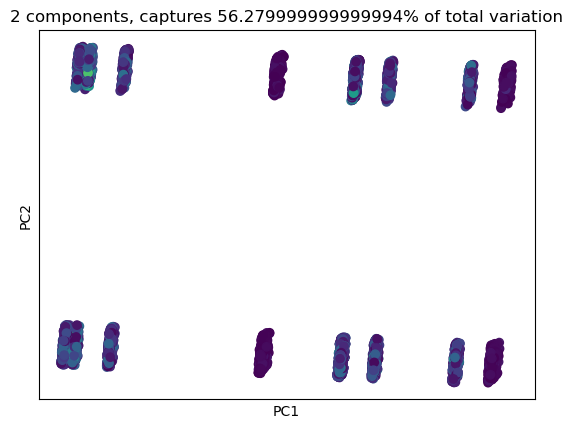

In [238]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {}% of total variation'.format(cummulative_explained_variance[1].round(4)*100))
plt.show()

## We'll be adding dummy values into the original dataframe for better acurracy

In [328]:
new_X = mart_data.drop(columns = ['Outlet_Identifier', 'Item_Outlet_Sales', 'Outlet_Establishment_Year'])

In [330]:
new_X = new_X[~new_X['Item_Identifier'].isin(invalid_data)]

In [332]:
new_X = new_X.drop('Item_Identifier', axis='columns')

In [334]:
dummied_X = pd.get_dummies(new_X)

In [336]:
dummied_X

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,True,False,False,False,False,False,True,...,False,True,False,True,False,False,False,True,False,False
1,5.920,0.019278,48.2692,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.500,0.016760,141.6180,True,False,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.200,0.000000,182.0950,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.930,0.000000,53.8614,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,True,False,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
8519,8.380,0.046982,108.1570,False,True,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
8520,10.600,0.035186,85.1224,True,False,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
8521,7.210,0.145221,103.1332,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [338]:
dummy_columns = dummied_X.columns

In [340]:
dummy_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [342]:
for col in dummy_columns:
    dummied_X[col] = le.fit_transform(dummied_X[col])

In [344]:
mima_scaled_dummy_X = mima_scaler.fit_transform(dummied_X)

In [346]:
mima_scaled_dummy_X = pd.DataFrame(mima_scaled_dummy_X, columns=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular', 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'])

In [348]:
mima_scaled_dummy_X

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.684337,0.084317,0.941870,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.137349,0.111746,0.079697,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.903614,0.090794,0.488458,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.944578,0.000000,0.711879,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.638554,0.000000,0.105644,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,0.301205,0.496635,0.834541,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8515,0.561446,0.416127,0.340859,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8516,0.720482,0.292190,0.212805,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8517,0.359036,0.910730,0.312890,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [350]:
mima_scaled_y = mima_scaler.fit_transform(new_mart_data[['Item_Outlet_Sales']])

In [352]:
mima_scaled_y = pd.DataFrame(mima_scaled_y, columns = ['Item_Outlet_Sales'])

In [354]:
mima_scaled_y

,Item_Outlet_Sales
0,0.283587
1,0.031419
2,0.158115
3,0.053555
4,0.073651
...,...
8514,0.210293
8515,0.039529
8516,0.088850
8517,0.138835


In [356]:
def covariance(x):
    return (x.T @ x)/(x.shape[0]-1)
cov_mat = covariance(mima_scaled_dummy_X)
cov_mat

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Weight,0.635063,0.356630,0.375727,0.491916,0.263805,0.055205,0.020227,0.009851,0.055725,0.061817,...,0.077864,0.263682,0.215202,0.215994,0.229554,0.310174,0.108067,0.461542,0.076697,0.109415
Item_Visibility,0.356630,0.314167,0.233741,0.297095,0.173718,0.037530,0.014175,0.007755,0.036178,0.040925,...,0.048603,0.145659,0.137870,0.137381,0.147433,0.185999,0.080342,0.293826,0.048912,0.047734
Item_MRP,0.375727,0.233741,0.325121,0.319892,0.175602,0.032419,0.014518,0.006537,0.037078,0.041921,...,0.054311,0.161793,0.140086,0.138605,0.162203,0.194687,0.062682,0.324740,0.054293,0.053779
Item_Fat_Content_Low Fat,0.491916,0.297095,0.319892,0.647570,0.000000,0.038624,0.016436,0.004813,0.040033,0.049073,...,0.071143,0.211082,0.181968,0.180794,0.212374,0.254402,0.082766,0.423691,0.070204,0.070909
Item_Fat_Content_Regular,0.263805,0.173718,0.175602,0.000000,0.352548,0.037333,0.013031,0.008100,0.036159,0.030876,...,0.038272,0.116459,0.098263,0.099436,0.114581,0.138530,0.044259,0.231040,0.038741,0.038507
Item_Type_Baking Goods,0.055205,0.037530,0.032419,0.038624,0.037333,0.075957,0.000000,0.000000,0.000000,0.000000,...,0.008570,0.023832,0.021836,0.021601,0.024771,0.029584,0.009861,0.050012,0.007983,0.008100
Item_Type_Breads,0.020227,0.014175,0.014518,0.016436,0.013031,0.000000,0.029467,0.000000,0.000000,0.000000,...,0.002935,0.009744,0.008335,0.007866,0.009861,0.011740,0.003874,0.018784,0.003170,0.003639
Item_Type_Breakfast,0.009851,0.007755,0.006537,0.004813,0.008100,0.000000,0.000000,0.012914,0.000000,0.000000,...,0.001526,0.004226,0.003522,0.003874,0.003757,0.005283,0.002231,0.007983,0.001409,0.001291
Item_Type_Canned,0.055725,0.036178,0.037078,0.040033,0.036159,0.000000,0.000000,0.000000,0.076192,0.000000,...,0.007631,0.025475,0.022188,0.020780,0.026062,0.029350,0.008570,0.050012,0.009157,0.008453
Item_Type_Dairy,0.061817,0.040925,0.041921,0.049073,0.030876,0.000000,0.000000,0.000000,0.000000,0.079948,...,0.009392,0.025475,0.023245,0.024067,0.025123,0.030758,0.010801,0.052829,0.008570,0.007748


In [358]:
from numpy.linalg import eig

eig_values, eig_vecs = eig(cov_mat)

In [360]:
eig_values.shape

(31,)

In [362]:
eig_vecs.shape

(31, 31)

In [364]:
eig_pairs = [(np.abs(eig_values[i]), eig_vecs[i,:]) for i in range (len(eig_values))]
eig_pairs

[(2.728322911349413,
  array([-4.61664338e-01, -1.02238412e-01, -5.90836466e-02, -4.28305328e-02,
         -9.47680084e-02, -1.44027558e-01,  6.39205830e-03,  2.97623338e-02,
         -2.71558562e-01,  5.13959196e-03, -1.20329193e-02, -1.26649376e-02,
         -3.32634197e-02,  6.20178403e-02,  1.70168108e-01,  4.03902806e-01,
          1.05464391e-01, -2.58370060e-02,  6.66514037e-04, -6.51744093e-01,
          2.32627545e-03, -4.16470564e-02, -8.84849233e-02,  1.12336212e-01,
          9.18244235e-02,  2.72380221e-02,  1.94490871e-02, -3.18051163e-02,
         -1.35841898e-14,  9.05696302e-15, -3.43998964e-15])),
 (0.6813182165872372,
  array([-2.89634805e-01, -3.03594613e-02, -7.47596619e-02, -3.72095944e-02,
         -1.82227830e-01, -7.87697798e-02,  6.02770898e-03,  9.10163124e-03,
          2.10004776e-01,  4.67914163e-01, -4.77298828e-02,  1.63013995e-01,
          3.64760689e-01, -2.72601198e-01, -4.66745664e-01, -2.61524764e-01,
         -2.04836240e-01,  6.80466982e-02, -3.2

In [366]:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [368]:
sorted_eig_values = np.array([x[0] for x in eig_pairs])
sorted_eig_vectors = np.array([x[1] for x in eig_pairs])

In [370]:
k = 2
w = sorted_eig_vectors[:k, :]

In [372]:
total_eig_values = sum(sorted_eig_values)
total_eig_values

5.992008249661372

In [374]:
explained_variance = [(i/total_eig_values)*100 for i in sorted_eig_values]
explained_variance = np.round(explained_variance, 2)
cummulative_explained_variance = np.cumsum(explained_variance)

print('Explained Variance: {}'.format(explained_variance))
print('Cummulative Explained Variance: {}'.format(cummulative_explained_variance))

Explained Variance: [45.53 11.37  7.79  6.14  3.9   3.31  2.38  2.05  1.94  1.76  1.64  1.53
  1.37  1.29  1.25  1.13  1.01  0.92  0.81  0.57  0.53  0.43  0.34  0.3
  0.23  0.22  0.13  0.13  0.    0.    0.  ]
Cummulative Explained Variance: [ 45.53  56.9   64.69  70.83  74.73  78.04  80.42  82.47  84.41  86.17
  87.81  89.34  90.71  92.    93.25  94.38  95.39  96.31  97.12  97.69
  98.22  98.65  98.99  99.29  99.52  99.74  99.87 100.   100.   100.
 100.  ]


In [376]:
n_sample, n_features = mima_scaled_dummy_X.shape

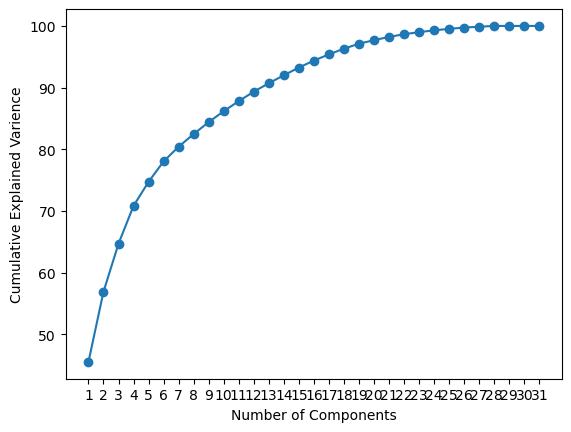

In [378]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1, n_features+1), cummulative_explained_variance, '-o')
plt.xticks(np.arange(1, n_features+1))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Varience")
plt.show()

In [380]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2).fit(mima_scaled_dummy_X)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cummulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cummulative Explained Variance:\n', cummulative_explained_variance)

X_pca = pca.transform(mima_scaled_dummy_X)
print('Transformed data shape: ', X_pca.shape)

Components:
 [[ 6.22396709e-02  5.50132424e-03 -1.15153713e-03 -2.56685665e-03
   2.56685665e-03 -1.71295840e-03  4.04168574e-04  7.89537494e-04
  -1.17142358e-03 -1.74374723e-03 -3.83203366e-03  4.75798020e-03
   1.02588968e-04  2.77077110e-03 -4.41653092e-04  4.90044926e-03
  -8.68572277e-04 -2.61003911e-04  2.32540544e-04 -3.40438136e-03
  -5.22262641e-04  4.08417158e-02  4.05872352e-01 -2.98172365e-01
  -1.50063799e-01 -3.74467394e-01  5.24531193e-01  4.87104491e-02
  -4.63176203e-01  2.04951105e-01  2.09514648e-01]
 [-8.80452845e-03  3.14216279e-02  2.76183997e-03 -6.91469955e-01
   6.91469955e-01  3.55910521e-02  7.83273260e-03  1.05809361e-02
   3.11346278e-02  8.40392209e-03  4.33482071e-02  7.99321361e-02
  -2.76730422e-02 -7.35342441e-02 -1.44363084e-01  3.93822179e-02
  -2.16576374e-02  1.46862123e-03  3.88743903e-02 -3.39632499e-02
   4.64241400e-03 -3.15418509e-03  3.85975451e-03  2.79614001e-03
   1.01179142e-02 -4.54694328e-03 -5.57097092e-03 -3.31774000e-04
   2.0721202

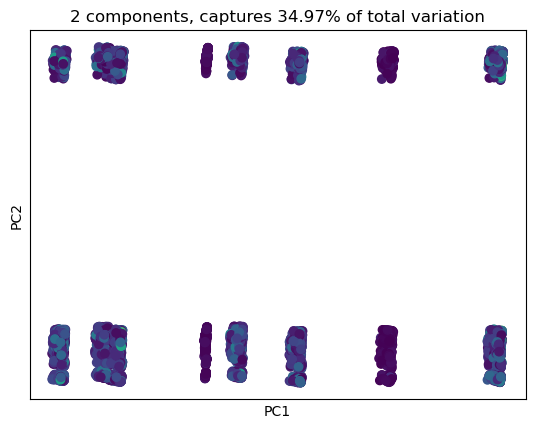

In [382]:
plt.scatter(X_pca[:, 0], X_pca[:, -1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {}% of total variation'.format(cummulative_explained_variance[1].round(4)*100))
plt.show()